## Introduction to Computer Programming (SOFT40161)

In [1]:
#pip install PyQt5 #GUI Lib

In [1]:
#Import all required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

## Introduction


Air Quality is amongst the most critical environment and health concerns. With the emergincg concentration of pollutants like Carbon Mono-oxide, non-metanic hydrocarbons, NOx (Nitrogen Oxides), NO2 (Nitrogen Dioxide) or Benzene etc. due to increasing vehicular emissions, industrial activities, urbanization of the land areas, etc., and the associated impacts on health (Cardiovascular diseases; respiratory problems, or other life expectancy and quality issues) the concern has gained increased attention. Therefore it has become important to continuously monitor and analysis the issue. The current project is focused on a similar analysis where a time-series data with these pollutant variables will be analyzed to understand the associated trends and patterns. Such an analysis can actively contribute towards helping the policy makers with evidence and data driven insights to better assess the associated environmental and health risks as well as creating control policies from public health perspective. 

## Section 1: Control Structures and Importing Data

- The problem at hand

The threat associated with Air pollution is ever increasing with imminent impacts on health, environment and general wellbeing, thereby making it as one of the key areas to be resolved. The problem at hand is to process and analyze the air quality dataset (key pollutants within the air) and create evidence based insights that can be leveraged into regulatory decision making by policy makers. 

- Dataset in consideration

The current dataset is taken from the UCI Machine Learning Repository available at Link: https://archive.ics.uci.edu/ml/datasets/Air+Quality
The dataset contains a total of 9358 rows or instances with each having hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) (columns). The data was collected during the time frame of March 2004 to February 2005 from a highly polluted area within an Italian city. The data was collected using 5 different metal oxide chemical sensors (and the responses were averaged). 

- Use of Control Structures during analysis
  
Control structures are used in programming to control and manage the flow of execution. These can be used to process conditional statements, sequential statements or looping or iterative programming statements(Python Documentation, n.d.). As in the current case a range of control structures were used including:

    -	For Loops were used to effectively calculate the average CO concentration on row by row basis (iterations)
    -	If; If-else-if conditional control structures were used to effectively detect high pollution level values as well as categorizing the pollutions 

levels into distinct categories (high, moderate and low).

- Note: 
Requirements pertaining to the analysis results, insights findings and individual reflection have been addressed in detail at the end of the notebook for better integration with all form of analysis conducted within the report.

#### Importing Data

In [3]:
# Read the dataset using correct separator
df = pd.read_csv("AirQualityUCI.csv", sep=';')

In [4]:
# Check number of Rows and Columns
df.shape

(9471, 17)

In [5]:
# Top 5 rows overview of data
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


In [6]:
# Basic infomation of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [7]:
# Remove completely empty columns
df = df.dropna(axis=1, how='all')

In [8]:
# Replace missing value indicator (-200) with NaN
df.replace(-200, pd.NA, inplace=True)

In [9]:
# Convert CO(GT) column from string with comma to numeric
df['CO(GT)'] = df['CO(GT)'].astype(str)
df['CO(GT)'] = df['CO(GT)'].str.replace(',', '.', regex=False)
df['CO(GT)'] = pd.to_numeric(df['CO(GT)'], errors='coerce')
df['CO(GT)']

0       2.6
1       2.0
2       2.2
3       2.2
4       1.6
       ... 
9466    NaN
9467    NaN
9468    NaN
9469    NaN
9470    NaN
Name: CO(GT), Length: 9471, dtype: float64

In [10]:
# Remove invalid or missing CO values
df = df.dropna(subset=['CO(GT)'])
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2.0,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,2.2,1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,2.2,1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,1.6,1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9352,04/04/2005,10.00.00,3.1,1314.0,NaN,"13,5",1101.0,472.0,539.0,190.0,1374.0,1729.0,"21,9","29,3","0,7568"
9353,04/04/2005,11.00.00,2.4,1163.0,NaN,"11,4",1027.0,353.0,604.0,179.0,1264.0,1269.0,"24,3","23,7","0,7119"
9354,04/04/2005,12.00.00,2.4,1142.0,NaN,"12,4",1063.0,293.0,603.0,175.0,1241.0,1092.0,"26,9","18,3","0,6406"
9355,04/04/2005,13.00.00,2.1,1003.0,NaN,"9,5",961.0,235.0,702.0,156.0,1041.0,770.0,"28,3","13,5","0,5139"


In [11]:
# Calculate average CO concentration using a loop
total_co = 0
count = 0

for value in df['CO(GT)']:
    if value > 0:
        total_co = total_co + value
        count = count + 1

average_co = total_co / count
print("Average CO concentration:", round(average_co, 2))

Average CO concentration: 2.15


In [12]:
# Identify unusually high CO values
high_co_count = 0

for value in df['CO(GT)']:
    if value > 5:
        high_co_count = high_co_count + 1

print("Number of high CO pollution records:", high_co_count)

Number of high CO pollution records: 344


In [13]:
# Classify pollution level for the first 15 records
for i in range(15):
    co_value = df['CO(GT)'].iloc[i]

    if co_value < 2:
        print("Record", i+1, ": Low pollution")
    elif co_value < 5:
        print("Record", i+1, ": Moderate pollution")
    else:
        print("Record", i+1, ": High pollution")

Record 1 : Moderate pollution
Record 2 : Moderate pollution
Record 3 : Moderate pollution
Record 4 : Moderate pollution
Record 5 : Low pollution
Record 6 : Low pollution
Record 7 : Low pollution
Record 8 : Low pollution
Record 9 : Low pollution
Record 10 : Low pollution
Record 11 : Low pollution
Record 12 : Low pollution
Record 13 : Low pollution
Record 14 : Low pollution
Record 15 : Moderate pollution


The Air Quality dataset contains hourly air pollution measurements collected using chemical sensors. The data uses semicolons as separators and commas as decimal markers, which are converted before analysis. Control structures such as for-loops and if–else conditions are used to calculate the average carbon monoxide (CO) concentration and to detect high pollution values. Conditional statements are also applied to classify pollution levels into low, moderate, and high categories. 

## Section 2: Functions and Modules

The concepts of modular programming were applied in the project. As a part of the process, a number of reusable python functions were used along with different external modules. The idea being modular programming is to ensure clarity, maintainability and reusability of the code (Lee, 2024). As in the current case, multiple independent functions were developed to support the key tasks such as data loading, cleaning, analysis or visualization etc.  

- Functions and External Modules used:

As in the current project functions as listed below were developed and used for analysis:

clean_co_column() was used to handle the pre-processing requirements associated with CO data. The function contributed towards data format change, managing invalid and missing values in the said dataset while ensuring reusability of the module whenever needed on a new data. calculate_average_co() was developed to calculate the mean CO concentration. The function made use of the NumPy library. Similarly other functions like count_high_pollution() and plot_co_values() were developed and used for mapping high pollution records and creating the visualizations as needed. Creating these distinctive functions allowed to separate tasks like data pre-procesisng from arithmetic operations, to visual logic etc. 

In addition to these functions, external modules were also used in the current programming approach. Libraries like Pandas allowed for data loading and manipulation operations whereas NumPy was used for numerical processing of the dataset values. Similarly, Matplotlib and Seaborn libraries were used for visualization operations and were then supported by PyQt5 library for GUI development and interactive experience enhancement.


In [14]:
def clean_co_column(data):
    """
    Cleans and preprocesses the 'CO(GT)' column in the given dataset.

    Parameters:
    data : pandas.DataFrame
        Input dataset containing the 'CO(GT)' column.

    Returns:
    pandas.DataFrame
        Cleaned dataset with valid numeric values in the 'CO(GT)' column.
    """
    # Convert CO(GT) column to string
    data['CO(GT)'] = data['CO(GT)'].astype(str)

    # Replace comma with dot for decimal values
    data['CO(GT)'] = data['CO(GT)'].str.replace(',', '.', regex=False)

    # Convert to numeric and remove invalid values
    data['CO(GT)'] = pd.to_numeric(data['CO(GT)'], errors='coerce')
    data = data.dropna(subset=['CO(GT)'])

    return data


In [15]:
# Calculate average CO concentration using NumPy
def calculate_average_co(data):
    """
    Calculates the average (mean) carbon monoxide (CO) concentration.

    This function computes the mean value of the 'CO(GT)' column
    using NumPy, assuming the data has already been cleaned and
    contains valid numeric values only.

    Parameters:
    data : pandas.DataFrame
        Input dataset containing a cleaned 'CO(GT)' column.

    Returns:
    float
        The average carbon monoxide (CO) concentration.
    """
    avg = np.mean(data['CO(GT)'])
    return avg

In [16]:
# Count records where CO level is above a specified threshold
def count_high_pollution(data, threshold):
    """
    This function iterates through the 'CO(GT)' column and identifies
    instances where the CO concentration is greater than the given
    threshold value.

    Parameters:
    data : pandas.DataFrame
        Input dataset containing the 'CO(GT)' column with numeric values.
    threshold: float
        CO concentration threshold used to classify high pollution levels.

    Returns:
    int
        Total number of records where CO concentration exceeds the threshold.
    """
    count = 0
    for value in data['CO(GT)']:
        if value > threshold:
            count += 1
    return count

In [17]:
def plot_co_values(data):
    """
    This function filters out invalid or non-positive CO values and
    generates a line plot to visualize CO pollution levels across
    records. The visualization helps identify trends, variations,
    and potential spikes in CO concentration.

    Parameters:
    data : pandas.DataFrame
        Input dataset containing the 'CO(GT)' column with numeric values.

    Returns:
    None
        Displays a line plot of CO concentration values.
    """
    valid_data = []

    for value in data['CO(GT)']:
        if value > 0:
            valid_data.append(value)

    plt.figure()
    plt.plot(valid_data)
    plt.xlabel("Record Index")
    plt.ylabel("CO Concentration")
    plt.title("CO Pollution Levels")
    plt.show()

In [18]:
# use created functions

df = clean_co_column(df)

average_co = calculate_average_co(df)
print("Average CO concentration:", round(average_co, 2))


high_pollution = count_high_pollution(df, 5)
print("High pollution records:", high_pollution)

Average CO concentration: -34.21
High pollution records: 344


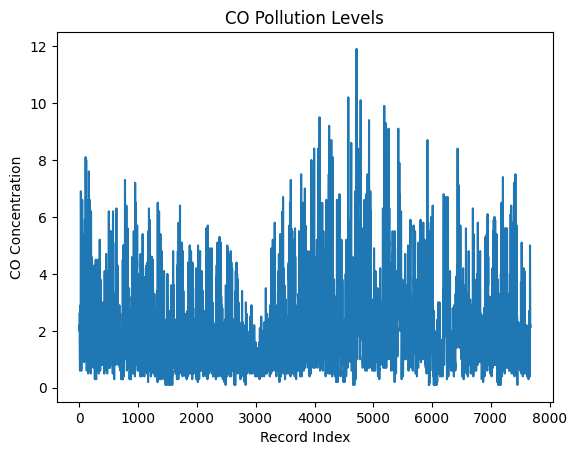

In [19]:
plot_co_values(df)

This section demonstrates the use of functions and external Python modules for data analysis. Separate functions are created for loading data, cleaning the CO concentration column, calculating average pollution levels, counting high pollution records, and visualizing data. The Pandas module is used for dataset handling, NumPy is used for numerical calculations, and Matplotlib is used for visualization. 

The section primarily focusses on data transformation and handling operations including managing the missing values, duplicate entries, and any other form of data inconsistency. The idea to transform the dataset into a reliable source of insights with potential for meaningful and reliable interpretation to contribute towards the overall objectives (Maharana, Mondal and Nemade, 2022). 

- **Step 1: Handling Missing values**

The missing values in the data set were checked using the isna().sum() function. The functions allowed to test and check which columns contain missing data and the severity for the missing value across each attribute (i.e. extent of missing value for a said column). 
Based on the number of missing values, different handling strategies are applied instead of using a single method for all columns. Refer to the following summary of missing values findings and the handling strategies used:

Sensor-related columns 

- Sensor-related columns such as PT08.S1(CO), PT08.S2(NMHC), PT08.S3(NOx), PT08.S4(NO2), and PT08.S5(O3) contain a relatively small number of missing values. 
- These missing values were filled using the mean values of the respective columns. This allowed to ensure that the overall data trend within the attribute can be preserved and the overall results of the data distribution were not altered to create any data bias.

The NMHC(GT) column

- The said column had high frequency of missing value therefore the same strategy to fill using mean values is expected to create a data bias. As a result, it was decided that the said rows with missing values will be dropped completely from the database.


NOx(GT) and NO2(GT) column
    •	The missing values in these two columns were filled using the median value approach as this column or attribute contained a moderate frequency of missing values. This approach allowed to ensure that the impact of outliers can be mitigated from the data thereby ensuring no bias is generated and data quality is preserved.

- **Step 2: Handling duplicate values**
  
The next step was to test the updated dataset for duplicate entries and the discovered duplicate rows were then dropped from the dataset to ensure reliability in the dataset. The function drop_duplicates() was used for the purpose. 

- **Step 3: Handling other inconsistencies** 

Date type conversion: The next step in the pre-processing operations was to convert the date-time format of the rows. 
Data filtering: Records with invalid or non-positive carbon monoxide values are filtered out because negative or zero pollution values are not realistic.

Creation of Categorical column: A new column called Pollution_Level was created using the threshold conditional analysis to categorize air quality conditions into low, moderate, and high pollution levels.
Aggregation operations: Pandas grouping and aggregation functions are used to summarize pollution categories and calculate average CO and temperature values. Monthly aggregation is also performed to identify time-based pollution trends.

All these operations (transformations, creation of categorical column, filtering and aggregation) were critical to develop a reliable and structured foundation for the subsequent trend analysis. It allowed to ensure that the data is not impacted by any outlier or bias and overall trend accuracy is preserved while making it easy for the forthcoming interpretation and exploration. 


In [20]:
# Missing Value check
df.isna().sum()

Date                0
Time                0
CO(GT)              0
PT08.S1(CO)       366
NMHC(GT)         8443
C6H6(GT)            0
PT08.S2(NMHC)     366
NOx(GT)          1639
PT08.S3(NOx)      366
NO2(GT)          1642
PT08.S4(NO2)      366
PT08.S5(O3)       366
T                   0
RH                  0
AH                  0
dtype: int64

In [21]:
# Missing Value handling
# Columns with small number of missing values
sensor_columns = [
    'PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
    'PT08.S4(NO2)', 'PT08.S5(O3)'
]

# Fill missing sensor values with column mean
for col in sensor_columns:
    df[col] = df[col].fillna(df[col].mean())

# NMHC(GT) has large number of missing values - Dropping the column to avoid unreliable analysis
df = df.drop(columns=['NMHC(GT)'])

# NOx and NO2 have moderate missing values
# Fill using median to reduce effect of outliers
df['NOx(GT)'] = df['NOx(GT)'].fillna(df['NOx(GT)'].median())
df['NO2(GT)'] = df['NO2(GT)'].fillna(df['NO2(GT)'].median())

# Final check
print(df.isna().sum())

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64


In [22]:
# Remove duplicate rows
df = df.drop_duplicates()

In [23]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.6,1360.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2.0,1292.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,2.2,1402.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"
3,10/03/2004,21.00.00,2.2,1376.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867"
4,10/03/2004,22.00.00,1.6,1272.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888"


In [24]:
# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

In [25]:
df['Date'] 

0      2004-03-10
1      2004-03-10
2      2004-03-10
3      2004-03-10
4      2004-03-10
          ...    
9352   2005-04-04
9353   2005-04-04
9354   2005-04-04
9355   2005-04-04
9356   2005-04-04
Name: Date, Length: 9357, dtype: datetime64[ns]

In [26]:
# Filter only valid CO values
df = df[df['CO(GT)'] > 0]

# Create a new column for pollution category
df['Pollution_Level'] = 'Low'

df.loc[df['CO(GT)'] >= 2, 'Pollution_Level'] = 'Moderate'
df.loc[df['CO(GT)'] >= 5, 'Pollution_Level'] = 'High'

# Count records per pollution category
pollution_summary = df['Pollution_Level'].value_counts()
print(pollution_summary)

Pollution_Level
Low         4125
Moderate    3167
High         382
Name: count, dtype: int64


This section focuses on higher-level data handling using Pandas. After converting the date column into a datetime format, the dataset is filtered to include only valid CO concentration values. A new categorical column is created to classify pollution levels based on CO concentration thresholds. Pandas grouping and aggregation functions are used to summarize pollution categories and calculate average CO and temperature values. Monthly aggregation is also performed to identify time-based pollution trends.

## Section 4: Data Visualizations

The section here presents a more detailed analysis of CO pollution patterns using Visual results to help support with interpretation of air quality conditions and respective insight generation. In the current project, Matplotlib and Seaborn were used to develop the visualization for the said purpose. 

- **Visualization charts used:**

A range of charts including line plot, bar chart, Scatter plot, Box plot, sub-plots and histograms were used in the analysis.

- **Visualization level findings and interpretation:**
  
The line plot visual maps the CO concentration across the time (Records). The visual clearly outlines how the CO concentration remains in low to moderate levels for extended period and there are short spikes of elevated or high CO concentration levels. This presents a clear evidence of episodic or non-regular trend in pollution event and that the poor air quality issue is not a regular or continuous event. Same trend is supported by the bar chart where it shows that low and moderate pollution levels have high frequency in the dataset. High pollution levels although non-regular and less than low or moderate are still present in considerable number of times.

The scatter plots helped to examine the existing correlation between CO concentration and other variables such as temperature, relative humidity etc. It displayed that the existing association is on the weak to moderate level. Additionally, the relation between temperature and pollution levels were also at dispersed levels. This helped understand that CO concentration is impacted by a group of variables instead of having a strong influence from a single one. Sub-plots were additionally used to support these relationship by using a side to side analysis.

Box plot was used for mapping the CO concentration across different pollution categories (Categorical column created). It highlighted variation and outliers in CO concentration across pollution levels thereby arguing that CO values are disproportionate to high pollution levels. Histogram was then used to support these findings where the skewedness in distribution towards lower CO values having higher concentration of pollution as well as lower.

All these trends and insights will be foundational towards any policy decision making by helping the decision makers in understanding that the existing relationship between CO-concentration and pollution is more complex and not dependent upon a single variable. Instead it will be critical to control all the associated variable or contributing pollutants. 

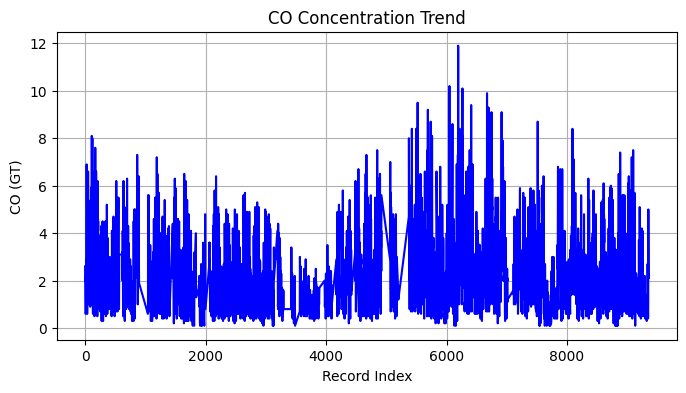

In [27]:
# Visualization 1: Line Plot - CO concentration trend over records

plt.figure(figsize=(8, 4))
plt.plot(df['CO(GT)'], color='blue')
plt.title("CO Concentration Trend")
plt.xlabel("Record Index")
plt.ylabel("CO (GT)")
plt.grid(True)
plt.show()

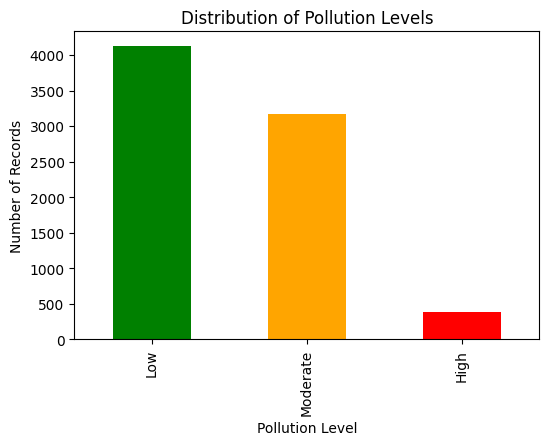

In [28]:
# Visualization 2: Bar Chart- Pollution level distribution

pollution_counts = df['Pollution_Level'].value_counts()

plt.figure(figsize=(6, 4))
pollution_counts.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title("Distribution of Pollution Levels")
plt.xlabel("Pollution Level")
plt.ylabel("Number of Records")
plt.show()

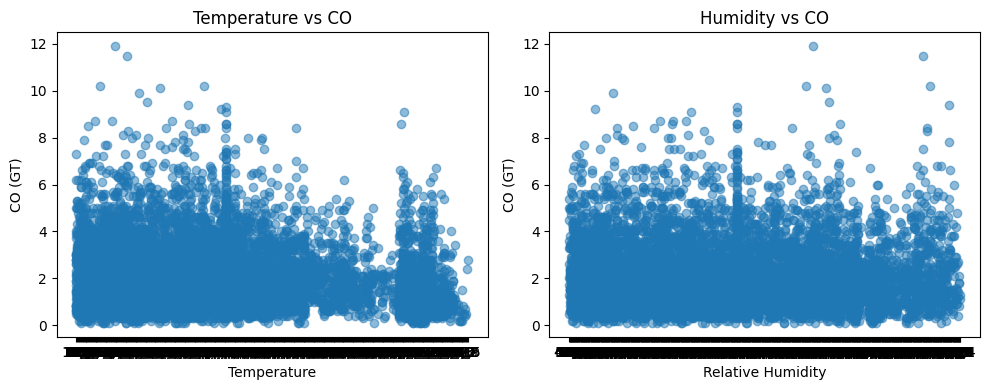

In [29]:
# Visualization 3: Subplots- Temperature vs CO and Humidity vs CO

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(df['T'], df['CO(GT)'], alpha=0.5)
plt.xlabel("Temperature")
plt.ylabel("CO (GT)")
plt.title("Temperature vs CO")

plt.subplot(1, 2, 2)
plt.scatter(df['RH'], df['CO(GT)'], alpha=0.5)
plt.xlabel("Relative Humidity")
plt.ylabel("CO (GT)")
plt.title("Humidity vs CO")

plt.tight_layout()
plt.show()

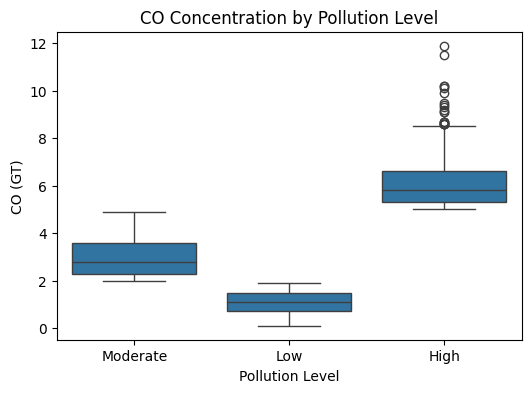

In [30]:
# CO values are distributed within each pollution category and highlights outliers.
plt.figure(figsize=(6, 4))
sns.boxplot(x='Pollution_Level', y='CO(GT)', data=df)
plt.title("CO Concentration by Pollution Level")
plt.xlabel("Pollution Level")
plt.ylabel("CO (GT)")
plt.show()

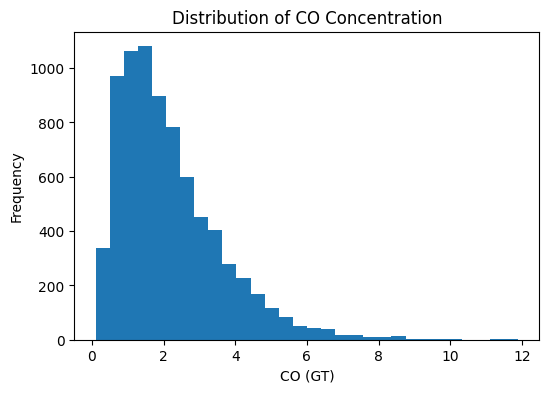

In [31]:
# Frequently different CO concentration ranges occur

plt.figure(figsize=(6, 4))
plt.hist(df['CO(GT)'], bins=30)
plt.title("Distribution of CO Concentration")
plt.xlabel("CO (GT)")
plt.ylabel("Frequency")
plt.show()

In this section, data visualization techniques are used to better understand air pollution patterns. A line plot is used to show how carbon monoxide concentration changes across records, which helps identify trends and fluctuations. A bar chart is created to display the distribution of pollution levels, making it easy to compare the frequency of low, moderate, and high pollution conditions. Subplots are used to visualize the relationship between CO concentration and environmental factors such as temperature and relative humidity. Proper labels, titles, and layout adjustments are applied to improve readability and clarity. visualizations are used to explore data distribution and trends more deeply. A box plot highlights variation and outliers in CO concentration across pollution levels. A histogram shows the frequency distribution of CO values, helping to understand common pollution ranges.

## Section 5: GUI Development

The GUI development within the current project was undertaken using the PyQt5 library/framework. The focus during the module development was on ensuring a streamlined user interaction for the users while using the system. The developed GUI layer will serve as the primary interaction point for the end users thereby allowing the non-tech users to interact with the dataset undertaking different EDA functions such as creating summary statistics across variables, generate different visualization using simple buttons.

From the perspective of the non-tech users, the backend functions and logic remains hidden from the users and with each button clicks different events are triggered from the GUI module to undertake the required operations.

As a part of the process, focus was given on developing a system with high usability that allows the users to effectively use the system without any confusion (Syamala, Shrivastava and Karmakar, 2025). The emphasis was on creating a clean layout with clearly labelled buttons and meaningful output messages for each triggered event. The approach included using interactive elements such as dropdown menus, button and guides to ensure that the users can be guided throughout the usage process. It would be critical to ensure that the overall risk of incorrect use or cognitive load associated with using the application can be minimized. This will allow to ensure an accessible, interactive and usable system development

In [ ]:
### GUI will popup in side window

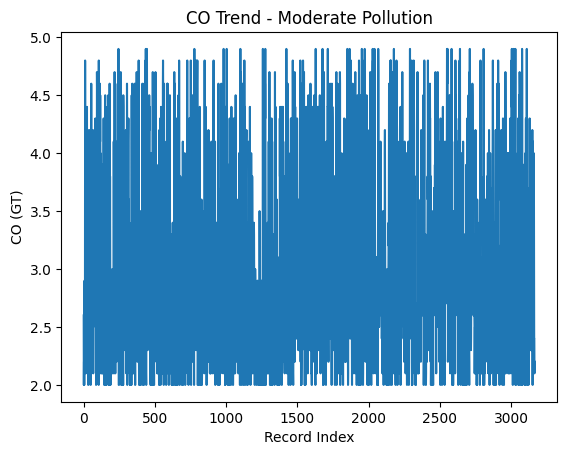

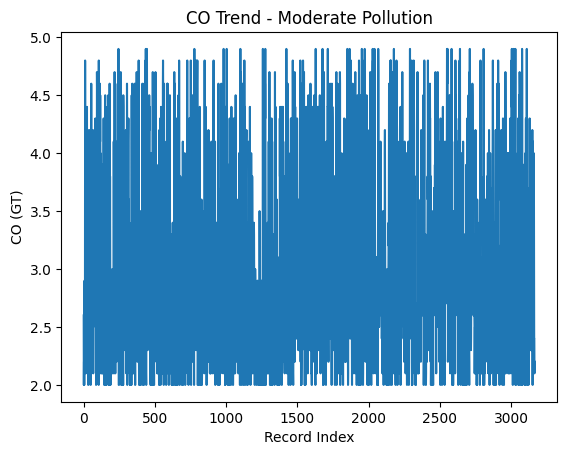

In [ ]:
from PyQt5.QtWidgets import (
    QApplication, QWidget, QLabel, QPushButton,
    QVBoxLayout, QComboBox, QMessageBox
)

# Load cleaned dataset
df = pd.read_csv("AirQualityUCI.csv", sep=';')
df = df.loc[:, ~df.columns.str.contains('Unnamed')]

df['CO(GT)'] = pd.to_numeric(
    df['CO(GT)'].astype(str).str.replace(',', '.'),
    errors='coerce'
)

df = df[df['CO(GT)'] > 0]

# Create pollution category
df['Pollution_Level'] = 'Low'
df.loc[df['CO(GT)'] >= 2, 'Pollution_Level'] = 'Moderate'
df.loc[df['CO(GT)'] >= 5, 'Pollution_Level'] = 'High'


class AirQualityGUI(QWidget):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Air Quality Data Explorer")
        self.setGeometry(200, 200, 350, 300)

        layout = QVBoxLayout()

        self.label = QLabel("Select Pollution Level:")
        layout.addWidget(self.label)

        self.combo = QComboBox()
        self.combo.addItems(["Low", "Moderate", "High"])
        layout.addWidget(self.combo)

        self.btn_stats = QPushButton("Show Summary Statistics")
        self.btn_stats.clicked.connect(self.show_stats)
        layout.addWidget(self.btn_stats)

        self.btn_plot = QPushButton("Plot CO Values")
        self.btn_plot.clicked.connect(self.plot_data)
        layout.addWidget(self.btn_plot)

        self.setLayout(layout)

    def show_stats(self):
        level = self.combo.currentText()
        subset = df[df['Pollution_Level'] == level]

        avg = round(subset['CO(GT)'].mean(), 2)
        maximum = round(subset['CO(GT)'].max(), 2)
        minimum = round(subset['CO(GT)'].min(), 2)

        QMessageBox.information(
            self,
            "Summary Statistics",
            f"Pollution Level: {level}\n"
            f"Average CO: {avg}\n"
            f"Max CO: {maximum}\n"
            f"Min CO: {minimum}"
        )

    def plot_data(self):
        level = self.combo.currentText()
        subset = df[df['Pollution_Level'] == level]

        plt.figure()
        plt.plot(subset['CO(GT)'].values)
        plt.xlabel("Record Index")
        plt.ylabel("CO (GT)")
        plt.title(f"CO Trend - {level} Pollution")
        plt.show()


app = QApplication(sys.argv)
window = AirQualityGUI()
window.show()
sys.exit(app.exec_())

In GUI:
1. Select Pollution Level -> "Low", "Moderate", "High
2. Click -> "Show Summary Statistics" - It will shows the stats in GUI
3. Click -> "Plot CO Values"
- As shown below

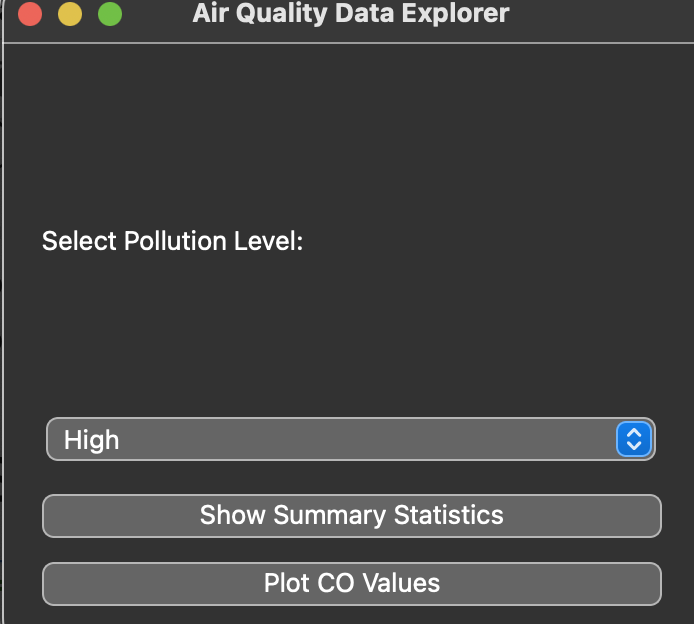

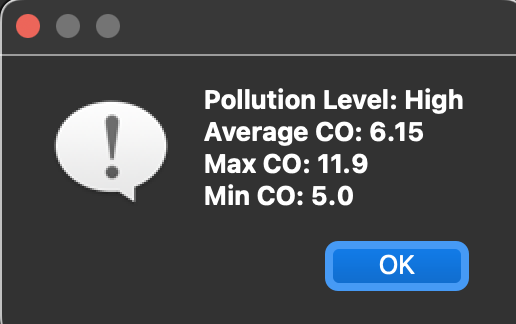

In [2]:
from IPython.display import Image, display

display(Image(filename="GUI-1.png"))
display(Image(filename="GUI-2.png"))

This section presents a graphical user interface developed using PyQt that enables interactive exploration of the air quality dataset. The interface allows users to select a pollution category using a dropdown menu. Based on the selected category, the GUI displays summary statistics such as average, minimum, and maximum CO concentration values. Users can also generate a visualization of CO trends specific to the selected subset.


## Conclusion, Findings, and Limitations

The project completion was done using python specifically focussing on the concepts of modular programming using Functions and control structures to ensure a structured programming approach. The focus was on studying the association and impact of Carbon monoxide generated pollution and how different pollutants along with CO impacts the pollution concentration levels. The study helped observe meaningful patterns into the analysis and were actively presented with the help of visualizations and GUI components to enable interactive enhancement.  


The results from the analysis were evidently clear showcasing that the majority of the observations or the data records have low to moderate level of pollution concentration. Additionally, it was discovered that pollution concentration was not extensively related to CO levels. The relationship between CO levels and other attributes such as temperature, humidity etc. was also studied and found to be non-conclusive yet moderate. The results from the analysis were although not free of certain limitations including the presence and the impact of missing sensor values data, and how the data handing process was undertaken. In addition to the same, the data was limited to a specific geographic boundary and therefore the results could not be generalized. The time frame of the data was also limited which can restrict from generalizing the data results in a larger spatial period.


## References

Lee, M.H. (2024). *Understanding Modular Programming in Python: A Guide to Modules and Packages*. [online] LinkedIn. Available at:  
https://www.linkedin.com/pulse/understanding-modular-programming-python-guide-modules-moonhee-lee-s7lvc/  
[Accessed 24 Dec. 2025].

Maharana, K., Mondal, S. and Nemade, B. (2022). *A Review: Data Pre-Processing and Data Augmentation Techniques*. **Global Transitions Proceedings**, [online] 3(1), pp. 91–99.  
https://www.sciencedirect.com/science/article/pii/S2666285X22000565

Python Documentation (n.d.). *4. More Control Flow Tools — Python 3.8.3 documentation*. [online] Available at:  
https://docs.python.org/3/tutorial/controlflow.html

Syamala, S., Shrivastava, A. and Karmakar, S. (2025). *Identifying interface design factors impacting user experience in digital learning platforms: A pilot study*. **Social Sciences & Humanities Open**, [online] 11, p. 101662.  
https://doi.org/10.1016/j.ssaho.2025.101662
